In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import pandas as pd
import seaborn as sns
import multiprocessing as mp
from src.data_processing.processors.guppy_processors.experimental_metadata import ExperimentMetaData, MetaDataFactory
from src.data_processing.processors.guppy_processors.config_loader import ConfigLoader
from src.data_processing.processors.guppy_processors.data_preprocessor import BatchBehaviorDataPreprocessor
from src.data_processing.processors.guppy_processors.processing_strategies import ProcessingStrategy, BehaviorProcessingStrategy
from src.data_processing.processors.guppy_processors.aggregators import BehaviorAggregationStrategy, aggregate_data
total_cores = mp.cpu_count()
print(f"Total number of cores: {total_cores}")


EXPERIMENTAL_CONFIGS = '/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/conf/config.yaml'
configs = ConfigLoader(EXPERIMENTAL_CONFIGS)
meta_data_factory = MetaDataFactory(configs)

Total number of cores: 12


In [31]:
meta_data_factory.all_meta_data[0].behavior_files

[PosixPath('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/3816-240206-113517/3816-240206-113517_output_1/Rwrp.hdf5'),
 PosixPath('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/3816-240206-113517/3816-240206-113517_output_1/Lick.hdf5'),
 PosixPath('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/3816-240206-113517/3816-240206-113517_output_1/endr.hdf5'),
 PosixPath('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/3816-240206-113517/3816-240206-113517_output_1/Cuet.hdf5')]

In [32]:
behavior_strategy_params={
    'config_key': 'behavioral_events',
    'time_window': (-10, 20),
    'events': (('cue', 'lick'), 
               ('cue', 'encoder'),
               ('reward', 'lick'),
               ('reward', 'encoder')
               )

}
meta_data_factory = MetaDataFactory(configs)
behavior_strategy = BehaviorProcessingStrategy(**behavior_strategy_params)
batch_behavior_preprocessor = BatchBehaviorDataPreprocessor(
    meta_data_factory, behavior_strategy)

# photometry_strategy = PhotometryProcessingStrategy
# batch_photometry_preprocessor = BatchPhotometryDataPreprocessor(meta_data_factory, photometry_strategy)

# batch_photometry_preprocessor.process_data(num_processors=10)
batch_behavior_preprocessor.process_data(num_processors=10)
files = configs.data_path.rglob('*processed_data.parquet')
aggregate_data(configs, BehaviorAggregationStrategy)
# aggregate_data(configs, PhotometryAggregationStrategy)

In [33]:
df = pd.read_parquet('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/aggregated_data/aggregated_behavior_data.parquet').sort_values(by = 'date')
df

,lick_aligned_to_cue,encoder_aligned_to_cue,lick_aligned_to_reward,encoder_aligned_to_reward,subject,user,date,time,time_recorded
154,0.000000,6.500000,0.000000,6.166667,3819.0,User,2024-02-01,20.000000,2024-02-12 16:51:00
94,0.111111,0.888889,0.111111,1.555556,3634.0,User,2024-02-01,8.311688,2024-02-12 10:34:26
95,0.111111,0.555556,0.111111,0.777778,3634.0,User,2024-02-01,8.506494,2024-02-12 10:34:26
96,0.222222,0.888889,0.111111,0.666667,3634.0,User,2024-02-01,8.701299,2024-02-12 10:34:26
97,0.111111,1.111111,0.111111,0.666667,3634.0,User,2024-02-01,8.896104,2024-02-12 10:34:26
...,...,...,...,...,...,...,...,...,...
101,5.178571,1.964286,2.321429,5.535714,117.0,User,2024-02-08,9.675325,2024-02-12 13:22:46
100,5.178571,1.071429,1.785714,6.964286,117.0,User,2024-02-08,9.480519,2024-02-12 13:22:46
99,4.464286,1.428571,0.535714,5.357143,117.0,User,2024-02-08,9.285714,2024-02-12 13:22:46
97,5.535714,1.785714,1.071429,5.357143,117.0,User,2024-02-08,8.896104,2024-02-12 13:22:46


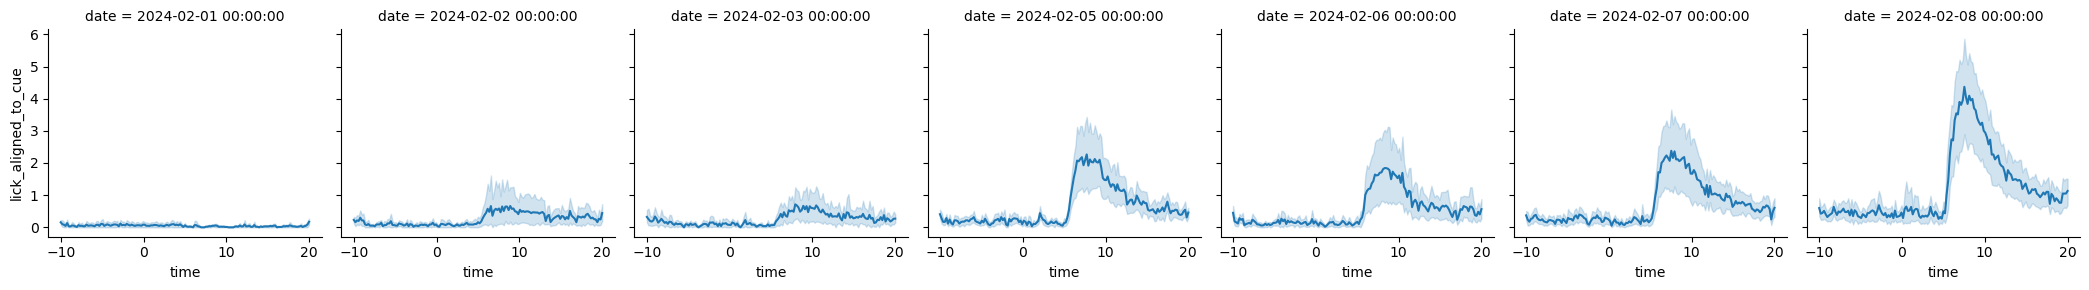

In [34]:
facet = sns.FacetGrid(data=df, col = 'date')
facet.map(sns.lineplot,  "time", "lick_aligned_to_cue")

In [ ]:
facet = sns.FacetGrid(data=df, col='date')
facet.map(sns.lineplot,  "time", "encoder_aligned_to_cue")

In [11]:
path = '/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/5079-240208-155139'
exp_data = ExperimentMetaData(configs, path)

In [12]:
for f in exp_data.guppy_output_path.iterdir():
    print(f.name)

peak_AUC_lick_LHA_z_score_LHA.csv
reward_LHA_z_score_LHA.h5
peak_AUC_reward_LHA_z_score_LHA.csv
cue_LHA_z_score_LHA.h5
peak_AUC_reward_LHA_z_score_LHA.h5
peak_AUC_cue_LHA_z_score_LHA.csv
cue_NAC.hdf5
465C.hdf5
lick_LHA.hdf5
freqAndAmp_z_score_LHA.h5
reward_NAC.hdf5
lick_LHA_baselineUncorrected_z_score_LHA.h5
405A.hdf5
encoder_LHA_z_score_LHA.h5
peak_AUC_cue_NAC_z_score_NAC.csv
reward_LHA_baselineUncorrected_z_score_LHA.h5
peak_AUC_encoder_NAC_z_score_NAC.h5
peak_AUC_encoder_LHA_z_score_LHA.csv
storesList.csv
cue_NAC_z_score_NAC.h5
lick_NAC.hdf5
encoder_NAC.hdf5
lick_LHA_z_score_LHA.h5
signal_LHA.hdf5
cue_LHA.hdf5
peak_AUC_cue_LHA_z_score_LHA.h5
peak_AUC_encoder_LHA_z_score_LHA.h5
transientsOccurrences_z_score_NAC.csv
cntrl_sig_fit_LHA.hdf5
z_score_LHA.hdf5
Rwrp.hdf5
dff_NAC.hdf5
encoder_LHA.hdf5
timeCorrection_NAC.hdf5
encoder_NAC_z_score_NAC.h5
dff_LHA.hdf5
cue_NAC_baselineUncorrected_z_score_NAC.h5
peak_AUC_cue_NAC_z_score_NAC.h5
control_NAC.hdf5
transientsOccurrences_z_score_LHA.csv

In [20]:
combos = [f"{event}_{structure}_z_score" for event in exp_data.config_data['behavioral_events'].values() for structure in  exp_data.config_data['structures'].values()]
combos

['cue_LHA_z_score',
 'cue_NAC_z_score',
 'lick_LHA_z_score',
 'lick_NAC_z_score',
 'reward_LHA_z_score',
 'reward_NAC_z_score',
 'encoder_LHA_z_score',
 'encoder_NAC_z_score']

In [23]:
for f in exp_data.guppy_output_path.iterdir():
    if any(combo in f.name for combo in combos) and not f.name.startswith('peak'):
        print(f)

/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/5079-240208-155139/5079-240208-155139_output_1/reward_LHA_z_score_LHA.h5
/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/5079-240208-155139/5079-240208-155139_output_1/cue_LHA_z_score_LHA.h5
/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/5079-240208-155139/5079-240208-155139_output_1/encoder_LHA_z_score_LHA.h5
/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/5079-240208-155139/5079-240208-155139_output_1/cue_NAC_z_score_NAC.h5
/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/c